In [5]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [6]:
# read in the CSV
df = pd.read_csv("./Resources/survey lung cancer.csv")
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,2
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,2
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,1
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,1


1. Preprocessing

In [4]:
# read in the CSV and get small data set
df = pd.read_csv("./Resources/survey lung cancer.csv")
df.head().T

,0,1,2,3,4
GENDER,M,M,F,M,F
AGE,69,74,59,63,63
SMOKING,1,2,1,2,1
YELLOW_FINGERS,2,1,1,2,2
ANXIETY,2,1,1,2,1
PEER_PRESSURE,1,1,2,1,1
CHRONIC DISEASE,1,2,1,1,1
FATIGUE,2,2,2,1,1
ALLERGY,1,2,1,1,1
WHEEZING,2,1,2,1,2


In [7]:
df.columns = df.columns.str.strip()
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')

In [8]:
columns_to_replace = ['smoking', 'yellow_fingers', 'anxiety', 'peer_pressure', 'chronic_disease', 'fatigue',
                       'allergy', 'wheezing', 'alcohol_consuming', 'coughing', 'shortness_of_breath', 'swallowing_difficulty',
                       'chest_pain', 'lung_cancer']
replacement_mapping = {1: 0, 2: 1}
df[columns_to_replace] = df[columns_to_replace].replace(replacement_mapping)
df['lung_cancer'] = df['lung_cancer'].replace({"YES":1,"NO":0})

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   gender                 309 non-null    object
 1   age                    309 non-null    int64 
 2   smoking                309 non-null    int64 
 3   yellow_fingers         309 non-null    int64 
 4   anxiety                309 non-null    int64 
 5   peer_pressure          309 non-null    int64 
 6   chronic_disease        309 non-null    int64 
 7   fatigue                309 non-null    int64 
 8   allergy                309 non-null    int64 
 9   wheezing               309 non-null    int64 
 10  alcohol_consuming      309 non-null    int64 
 11  coughing               309 non-null    int64 
 12  shortness_of_breath    309 non-null    int64 
 13  swallowing_difficulty  309 non-null    int64 
 14  chest_pain             309 non-null    int64 
 15  lung_cancer            

In [10]:
df.shape

(309, 16)

In [11]:
df.duplicated().sum()

33

In [12]:
df = df.drop_duplicates()
df.shape

(276, 16)

In [13]:
df.isnull().sum()

gender                   0
age                      0
smoking                  0
yellow_fingers           0
anxiety                  0
peer_pressure            0
chronic_disease          0
fatigue                  0
allergy                  0
wheezing                 0
alcohol_consuming        0
coughing                 0
shortness_of_breath      0
swallowing_difficulty    0
chest_pain               0
lung_cancer              0
dtype: int64

In [18]:
df['age'].describe()

count    276.000000
mean      62.909420
std        8.379355
min       21.000000
25%       57.750000
50%       62.500000
75%       69.000000
max       87.000000
Name: age, dtype: float64

In [19]:
df['gender'] = df['gender'].replace({"M":1,"F":2})

In [25]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

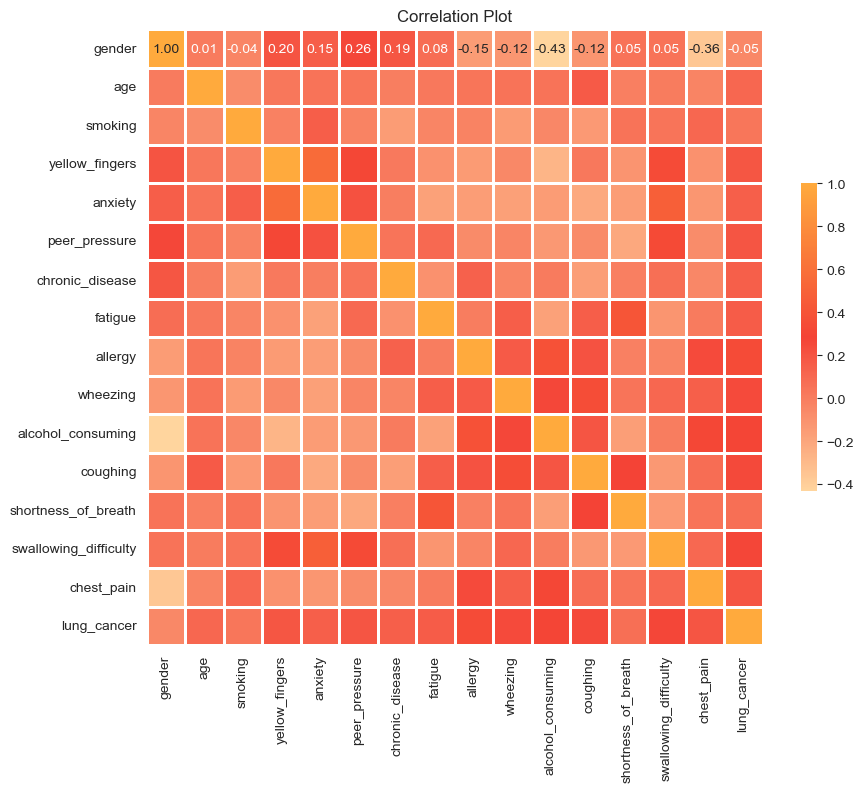

In [26]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")
colors = ['#ffd59e', '#f44336', '#ffaa3d']  
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=colormap,
            cbar_kws={"shrink": .5}, square=True,
            linewidths=1, linecolor='white')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Correlation Plot")
plt.show()

In [29]:
import plotly.express as px

In [30]:
df_plot = df.copy()
df_plot['lung_cancer'] = df_plot['lung_cancer'].replace({0: 'No', 1: 'Yes'})
fig = px.histogram(df_plot, x='lung_cancer', color='lung_cancer',
                   color_discrete_map={'No': '#a3a3ec', 'Yes': '#ff9f9f'},
                   labels={'lung_cancer': 'Lung Cancer'},
                   title='Distribution of Lung Cancer')
fig.update_xaxes(categoryorder='array', categoryarray=['Yes', 'No'])
total_counts = df_plot['lung_cancer'].count()
for i in range(2):
    count = df_plot[df_plot['lung_cancer'] == ['Yes', 'No'][i]]['lung_cancer'].count()
    percentage = count / total_counts * 100
    fig.add_annotation(
        x=['Yes', 'No'][i], y=count + 15,
        text=f'{percentage:.2f}%',
        showarrow=False,
        font=dict(family='sarif',size=12, color='black')
    )
fig.show()

In [31]:
df_copy = df.copy()
df_copy['gender'] = df_copy['gender'].replace({1: "Male", 2: "Female"})
df_copy['smoking'] = pd.to_numeric(df_copy['smoking'])
df_copy['lung_cancer'] = pd.to_numeric(df_copy['lung_cancer'])
male_total = len(df_copy[df_copy['gender'] == "Male"])
female_total = len(df_copy[df_copy['gender'] == "Female"])
male_smk_lc = len(df_copy[(df_copy['gender'] == "Male") & (df_copy['lung_cancer'] == 1) & (df_copy['smoking'] == 1)])
female_smk_lc = len(df_copy[(df_copy['gender'] == "Female") & (df_copy['lung_cancer'] == 1) & (df_copy['smoking'] == 1)])
data = {
    'Gender': ['Male', 'Female'],
    'Total Population': [male_total, female_total],
    'Smoking & Lung Cancer': [male_smk_lc, female_smk_lc],
    'Non-smoking & Lung Cancer': [male_total - male_smk_lc, female_total - female_smk_lc]
}
df_plot = pd.DataFrame(data)
fig = px.bar(df_plot, x='Gender', y=['Total Population', 'Smoking & Lung Cancer', 'Non-smoking & Lung Cancer'],
             title='Population and Lung Cancer Cases by Gender and Smoking',
             labels={'value': 'Count', 'variable': 'Category'},
             color_discrete_sequence=['#a3a3ec', '#ff9f9f', '#ffcccb'])
fig.update_layout(barmode='group')
fig.show()

In [32]:
df_copy = df.copy()
df_copy['gender'] = df_copy['gender'].replace({1: "Male", 2: "Female"})
df_copy['alcohol_consuming'] = pd.to_numeric(df_copy['alcohol_consuming'])
df_copy['lung_cancer'] = pd.to_numeric(df_copy['lung_cancer'])
male_total = len(df_copy[df_copy['gender'] == "Male"])
female_total = len(df_copy[df_copy['gender'] == "Female"])
male_alc_lc = len(df_copy[(df_copy['gender'] == "Male") & (df_copy['lung_cancer'] == 1) & (df_copy['alcohol_consuming'] == 1)])
female_alc_lc = len(df_copy[(df_copy['gender'] == "Female") & (df_copy['lung_cancer'] == 1) & (df_copy['alcohol_consuming'] == 1)])
data = {
    'Gender': ['Male', 'Female'],
    'Total Population': [male_total, female_total],
    'Alcohol & Lung Cancer': [male_alc_lc, female_alc_lc],
    'Non-Alcohol & Lung Cancer': [male_total - male_alc_lc, female_total - female_alc_lc]
}
df_plot = pd.DataFrame(data)
fig = px.bar(df_plot, x='Gender', y=['Total Population', 'Alcohol & Lung Cancer', 'Non-Alcohol & Lung Cancer'],
             title='Population and Lung Cancer Cases by Gender and Alcohol Consumption',
             labels={'value': 'Count', 'variable': 'Category'},
             color_discrete_sequence=['#a3a3ec', '#ff9f9f', '#ffcccb'])
fig.update_layout(barmode='group')
fig.show()

Logic Regression

In [40]:
X = df.drop('lung_cancer',axis=1)
Y = df['lung_cancer']

In [43]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
smote = SMOTE(sampling_strategy='minority')
X_resampled_over, Y_resampled_over = oversample.fit_resample(X, Y)
X_resampled_smote, Y_resampled_smote = smote.fit_resample(X, Y)
print("SMOTE:", Counter(Y_resampled_smote))

SMOTE: Counter({1: 238, 0: 238})


In [44]:
# Splitting the resampled dataset into train and test data

X_train_resampled, X_test_resampled, Y_train_resampled, Y_test_resampled = train_test_split(X_resampled_smote, Y_resampled_smote, test_size=0.2, random_state=42)

c:\Users\keyst\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Logistic Regression (with Resampled Data)
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        52
           1       0.98      0.95      0.97        44

    accuracy                           0.97        96
   macro avg       0.97      0.97      0.97        96
weighted avg       0.97      0.97      0.97        96

Confusion Matrix:
[[51  1]
 [ 2 42]]


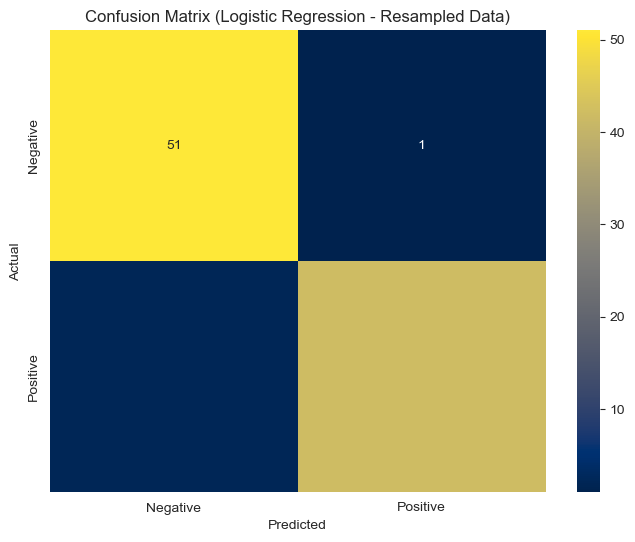

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
logistic_model_resampled = LogisticRegression()
logistic_model_resampled.fit(X_train_resampled, Y_train_resampled)
logistic_y_pred_resampled = logistic_model_resampled.predict(X_test_resampled)
logistic_classification_rep_resampled = classification_report(Y_test_resampled, logistic_y_pred_resampled)
logistic_conf_matrix_resampled = confusion_matrix(Y_test_resampled, logistic_y_pred_resampled)
print("Logistic Regression (with Resampled Data)")
print("Classification Report:")
print(logistic_classification_rep_resampled)
print("Confusion Matrix:")
print(logistic_conf_matrix_resampled)
plt.figure(figsize=(8, 6))
sns.heatmap(logistic_conf_matrix_resampled, annot=True, fmt="d", cmap="cividis",
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Logistic Regression - Resampled Data)')
plt.show()

In [48]:
from sklearn.ensemble import RandomForestClassifier

Random Forest (with Resampled Data)
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        52
           1       0.98      0.95      0.97        44

    accuracy                           0.97        96
   macro avg       0.97      0.97      0.97        96
weighted avg       0.97      0.97      0.97        96

Confusion Matrix:
[[51  1]
 [ 2 42]]


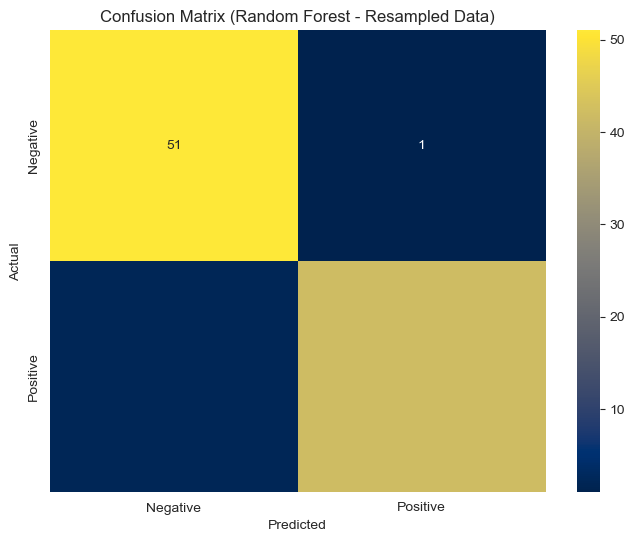

In [49]:
rf_model_resampled = RandomForestClassifier(n_estimators=100)
rf_model_resampled.fit(X_train_resampled, Y_train_resampled)
rf_y_pred_resampled = rf_model_resampled.predict(X_test_resampled)
rf_classification_rep_resampled = classification_report(Y_test_resampled, rf_y_pred_resampled)
rf_conf_matrix_resampled = confusion_matrix(Y_test_resampled, rf_y_pred_resampled)
print("Random Forest (with Resampled Data)")
print("Classification Report:")
print(rf_classification_rep_resampled)
print("Confusion Matrix:")
print(rf_conf_matrix_resampled)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix_resampled, annot=True, fmt="d", cmap="cividis",
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest - Resampled Data)')
plt.show()